  2.632103 seconds (14.05 M allocations: 1.287 GiB, 7.79% gc time)


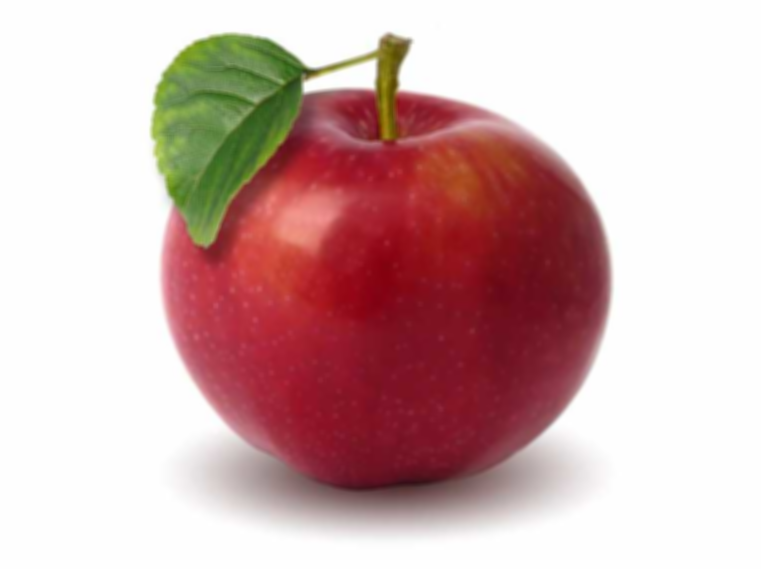

In [3]:
using FileIO, Images, ImageShow
include(raw"C:\Users\cp\pakiety grafika proj\ManagingFiles\ManagePic.jl")            #WPISAĆ ŚCIEŻKĘ DO MODUŁU JAGODY
using .ManagePic

pic = generate_matrices_RGB("obrazki/j.jpg")   #WPISAĆ ŚCIEŻKĘ DO OBRAZKA

mask = [1 1 1 1 1; 1 1 1 1 1 ; 1 1 1 1 1; 1 1 1 1 1; 1 1 1 1 1] #DlA TESTU ZWIĘKSZYŁEM O JEDNO MASKĘ I DODAŁEM NA DOLE 
                                                #3 zamiast 1 żeby działało



dimR = size(pic[1])
dimM = size(mask)


#########################


function nakładanie_maski(copied, mask, x,y)
    return sum((copy(copied[x:x+dimM[2]-1, y:y+dimM[1]-1]).*mask))/sum(mask)
    
end

funkcja_pakujaca_jagody(r, g, b) = ([RGB(r[i,j], g[i, j], b[i,j]) for i in 1:size(r)[1], j in 1:size(r)[2] ])


######################


final =  Array{Array{Float64,2},1}(undef, 3)

@time for col in 1:3
    aas = [nakładanie_maski(pic[col], mask, x,y) for
            x in 1:Int64(dimR[1] - ((dimM[1]-3)/2 +3) ), y in 1:Int64(dimR[2] - ((dimM[2]-3)/2 +3))]
    final[col] = aas
end

funkcja_pakujaca_jagody(final...)
